In [10]:
1e19/(2**7)

7.8125e+16

In [11]:
3.90625e+16*1.057E-17

0.412890625

In [10]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [11]:
from matplotlib.colors import LogNorm
import yt 
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


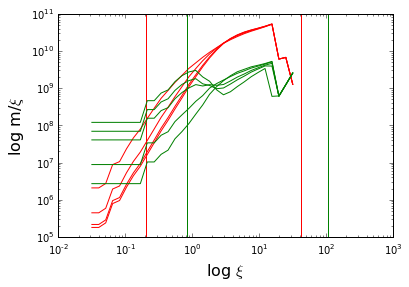

In [14]:

s = 30 
G = 6.67e-8 #cgs
c_s = 28730.5 #cm/s
tlst = [30]



xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,10,20,30]#,40,50]
hsv = plt.get_cmap('Plasma_r')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    c="red"
    data = np.loadtxt("fast_sum_args_list{}_lev7.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
    
min_cell_size =  1e19/2**(9)*1.057E-17
plt.axvline(min_cell_size,c="red")
plt.axvline(4e18*1.057E-17,c="red")
# plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
# plt.title("Sink (Level 7)",fontsize=16)



xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,28,30,32,40]
hsv = plt.get_cmap('Plasma')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    c="green"
    data = np.loadtxt("../../FLASH4.3_2/object/fat100/fast_sum_args_list{}_lev5.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
min_cell_size =  1e19/2**(7)*1.057E-17
plt.axvline(min_cell_size,c="green")
plt.axvline(1e19*1.057E-17,c="green")
# plt.legend(loc="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
# plt.title("New code, better ranges (No Sink)",fontsize=16)

lev 6~8 for the sink case 

In [29]:
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null
def plot_dens(i,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    if particle : 
        data =np.loadtxt("sinks_evol.dat_cleaned",skiprows=1)
        pcl_indx_at_t = np.where(np.isclose(int(ds.current_time.in_cgs()),data[:,1]))[0]
        print "Number of sink particles: " , len(pcl_indx_at_t)
        pcl_pos_at_t = data[pcl_indx_at_t,2:5]
        for pos in pcl_pos_at_t:
            slc.annotate_marker(pos, coord_system='data',marker='.',plot_args={'color':'black','s':3})
    slc.show()


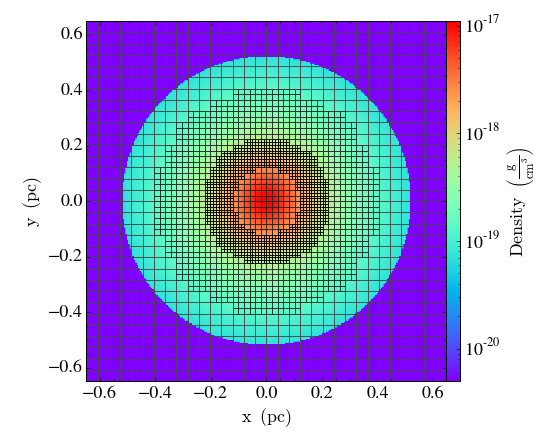

In [32]:
plot_dens(0,grid=True)

In [33]:
cd ../../FLASH4.3_2/object/fat100/

/global/project/projectdirs/astro250/doris/FLASH4.3_2/object/fat100



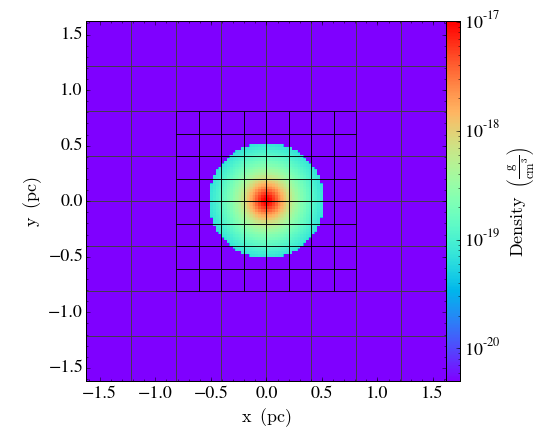

In [34]:
plot_dens(0,grid=True)

In [35]:
i =0 
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
boxlen=int(ds.domain_width[0])

lev = 5
dim = 2**(lev+3)
all_data = ds.covering_grid(level=lev, left_edge=[0,0,0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])
cell_size = int((ds.domain_width/dim)[0].in_cgs())
ri = 1.5998e18

xi_range = np.logspace(-0.1,np.log10(17),num=20)
r_range = xi_range/1.057E-17


ctr = shape(dens_arr)[0]/2
x,y,z =  np.indices((dens_arr.shape))
r = np.sqrt((x - ctr)**2 + (y -ctr)**2+(z -ctr)**2)*cell_size
ri = r_range[0]
dr  = cell_size 
ix,iy,iz =  np.where(np.isclose(r,ri,atol=dr))


In [16]:
print "xi  = ", 4e18*1.057E-17,"for the smaller (with sink) box"

print "xi  = ", 1e19*1.057E-17,"for the larger (no sink) box"

xi  =  42.28 for the smaller (with sink) box
xi  =  105.7 for the larger (no sink) box


In [23]:
pwd

u'/global/project/projectdirs/astro250/doris/FLASH4.3_3/object'

In [24]:
def density_radial_profile1(timestep):
#     ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
    ds = yt.load("/global/project/projectdirs/astro250/doris/FLASH4.3_3/object/sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
    c = ds.find_max("density")[1]
    ax = 0 # Cut through x axis
    # cutting through the y0,z0 such that we hit the max density
    ray = ds.ortho_ray(ax, (c[1], c[2]))
    srt = np.argsort(ray['x'])
    plt.figure()
    plt.subplot(211)
    plt.loglog(np.array(ray['x'][srt]), np.array(ray['density'][srt]))
    plt.title("Timestep {}".format(timestep),fontsize=13)
    plt.xlabel("log Radius",fontsize=13)
    plt.ylabel('log Density',fontsize=13)
    # plt.subplot(212)

In [25]:
def density_radial_profile2(timestep):
    ds = yt.load("/global/project/projectdirs/astro250/doris/FLASH4.3_2/object/fat100/sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
    c = ds.find_max("density")[1]
    ax = 0 # Cut through x axis
    # cutting through the y0,z0 such that we hit the max density
    ray = ds.ortho_ray(ax, (c[1], c[2]))
    srt = np.argsort(ray['x'])
    plt.figure()
    plt.subplot(211)
    plt.loglog(np.array(ray['x'][srt]), np.array(ray['density'][srt]))
    plt.title("Timestep {}".format(timestep),fontsize=13)
    plt.xlabel("log Radius",fontsize=13)
    plt.ylabel('log Density',fontsize=13)
    # plt.subplot(212)

YTOutputNotIdentified: Supplied ('/global/project/projectdirs/astro250/doris/FLASH4.3_3/object/sod_hdf5_chk_0010',) {}, but could not load!

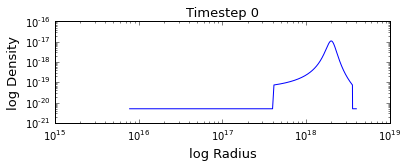

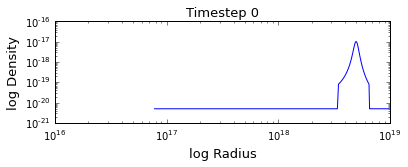

In [28]:
for i in np.arange(40):
    if i%10==0:
        density_radial_profile1(i)
        density_radial_profile2(i)